<a href="https://colab.research.google.com/github/meghna-panda/ElevateLabs-task4/blob/main/t4_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# Upload file
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [43]:
# Imports
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve


In [44]:
# Load dataset
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))


In [45]:
# Preprocessing
X = data.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y = LabelEncoder().fit_transform(data['diagnosis'])


In [46]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [49]:
# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [50]:
# Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


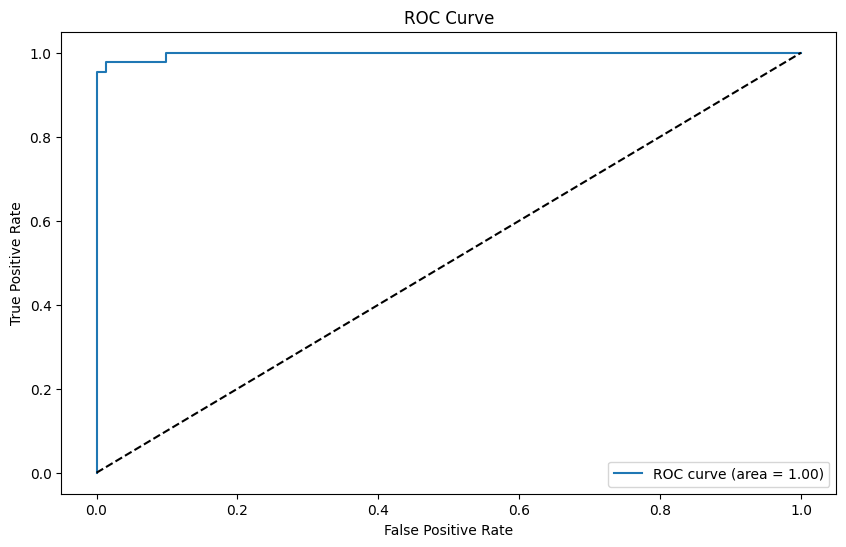

In [51]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
# Evaluate with manual threshold
threshold = 0.5
y_pred_thresholded = (y_prob >= threshold).astype(int)
print("Precision (threshold=0.5):", precision_score(y_test, y_pred_thresholded))
print("Recall (threshold=0.5):", recall_score(y_test, y_pred_thresholded))

Precision (threshold=0.5): 0.9761904761904762
Recall (threshold=0.5): 0.9534883720930233
